<a href="https://colab.research.google.com/github/juandelahoz/Au-public/blob/master/HumGenStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome

Welcome to the Statistics bootcamp for Human Genetics.
Your guides are:

Katie Leap (@katieLeap, kleap@ucla.edu)

Juan De la Hoz (@juanfdelahoz, jdelahoz@ucla.edu)

Alex Fisher (alexanderfisher@ucla.edu)

## Goals
We will talk about probability and statistics and illustrate how these concepts are used to study human genetics.

The main goal is to establish a common vocabulary so you can read, understand and critique models and methods while conducting research.

Furthermore, we hope to demystify common mathematical concepts and to build scaffolding so you can independently engage with statistical methods (and love them).

We will use code examples that you can try out now or come back to in the future. We will use Python and R examples, so lets go ahead and load the R environment:

In [0]:
%load_ext rpy2.ipython

# Introduction to Science

Science is the process through which we learn new things about reality.

But reality is messy, noisy, complicated, impossible to define. But through abstraction, we can come up with simplified versions of reality that we can study.

Science learns from the _representations_ or _models_ of reality.

The process of abstraction needs to be **very careful**. In order to generalize the conclusions of the analysis.

# Randomness
"A fool must now and then be right, by chance." 

_William Cowper, 1782_

This is an important concept, and you should devote some time (every day) to think about it: How does randomness affect your life?

Some questions to keep in mind when considering randomness:

* How do we **explain** events in the real world? 
* How do we know what _outcome_ to **expect** from any given process?
* How much of an outcome is _random_?
* What does it mean to "expect something to happen _by chance_"?
* Can we think of some outcome that is [Completely Random](https://www.random.org)?

In order to isolate and study true Randomness, statisticians use "Random Experiments" as thought excercises to understand how randomness works and what to expect by chance.

Let's try the simplest random experiment: flip a (virtual) coin.

In [0]:
%%R
# throw a coin:
rbinom( 1,       1,             0.5 )
#       ^trials  ^coins/trial   ^probability of heads

[1] 0


The outcome of this process can be thought of as a [Random Variable](https://en.wikipedia.org/wiki/Random_variable).

A Random Variable (X) is the answer to the question formulated for the random experiment.

# Probability

Flip the coin many times and notice that the outcome is unpredictable. Does that mean that you don't know anything about the outcome?

You _do_ know what the probability of the outcome is. So you _know_ something. 

The power of Probability lies in it being a tool to describe what you know and what you don't know with precision. It is used to describe patterns in random and unpredictable processes.

Now, repeat the experiment 10 times (or more) and observe the ___distribution___ of outcomes

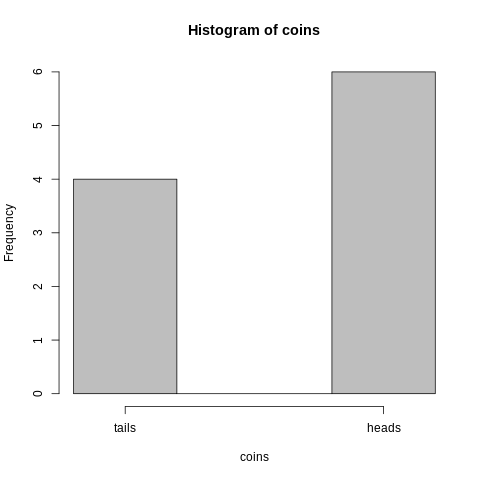

In [0]:
%%R
#set.seed(98)

# save it:
coins <- rbinom( 10, 1, 0.5 )

# plot it:
hist( coins, breaks=c(-0.2,0.2, 0.8,1.2), col=8, freq=TRUE, xaxt="n")
axis(side=1, at=c(0,1), labels=c("tails","heads"))

When less coins are flipped, the difference between heads and tails is often large, even though the probability of each outcome is 0.5. When more coins are flipped, the frequency of head and tails is more even. Why is this?

## The [Bernoulli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)
This distribution describes the probability of the outcome of a single coinflip.
It answers the question: what is the probability of obtaining heads on one coin?

What is a distribution?

* Set of events
* Relative frequency of those events

Let's take a moment to describe the Bernoulli distribution. What is reasonable to expect to happen by chance?

What [process in human genetics](https://www.pnas.org/content/112/16/E2102) can be described as a Bernoulli distribution?

___________

Now, flip two coins (process) and asking how many head I obtain (question):

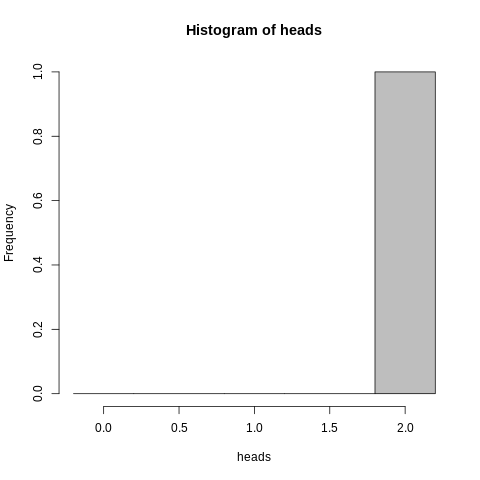

In [0]:
%%R

heads <- rbinom( 1, 2, 0.5 )
              #     ^N  ^P
hist( heads, breaks=c(-0.2,0.2, 0.8,1.2, 1.8,2.2), col=8, freq=TRUE)


What is the _set of possible events_ in this Random Experiment?

What is the _probability_ of each event?

What happens when you change the number of trials? How does the number of trials affect the distribution?

What happens if you change the probability of heads? What does this mean? 

Try: 1000 trials with a P(heads)=0.95 .

## The [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

This distribution describes the __number of successes in a set of trials__. It's the answer to the question: how many coins will turn out heads, if I flip N of them?

Consider the situation above, where you want to know how likely it is that you obtain two heads when throwing two coins.

How about two tails? Should you define the probability of tails too?

How often do you obtain one head and one tail?

What happens when the probability of heads on each flip is different from 0.5?

Lets observe now, how the frequency of head-head, head-tail and tail-tail changes as a function of the probability of heads.

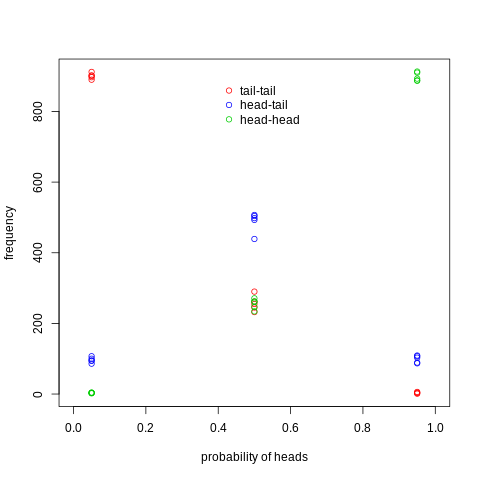

In [0]:
%%R
replicates = 5
probability_of_heads <- c(0.05, 
                          #0.10, 0.15, 0.20, 0.25, 0.30,
                          #0.35, 0.40, 0.45, 
                          0.5, 
                          #0.55, 0.60, 0.65, 0.70, 0.75,
                          #0.80, 0.85, 0.9, 
                          0.95 
                         )

p = probability_of_heads[1]
results = c(0,0,0)

for (i in probability_of_heads[1:length(probability_of_heads)]){
  p = i
  for (j in 1:replicates){
    trial = table(rbinom( 1000, 2, p ))
    for (l in 1:length(trial)){
      results_1 = c(as.numeric(names(trial)[l]), trial[l], p)
      results = rbind(results, results_1 )
    }
  }
}

results = data.frame(results[2:nrow(results),])
rownames(results) = 1:nrow(results)
names(results) = c("event","freq","prob")

plot(results[results$event==0,"prob"],results[results$event==0,"freq"],col=2,
    xlab="probability of heads",ylab="frequency",xlim=c(0,1))
points(results[results$event==1,"prob"],results[results$event==1,"freq"],col=4)
points(results[results$event==2,"prob"],results[results$event==2,"freq"],col=3)
legend(0.4,900,c("tail-tail","head-tail","head-head"),bty="n",pch=1,col=c(2,4,3))


If instead of coins we were talking about **alleles**, and instead of probability of heads we were talking about **allele frequency**. Then, flipping two coins would be a model for fertilization, where two gametes with a single copy of a gene find each other and form a **diploid organism**.

The two-coin example is exactly what you would expect to happen if **only chance** was acting on your population of diploid organisms. This is called: *Hardy-Weinberg equilibrium*. See an example [here](https://commons.wikimedia.org/wiki/File:Demonstrating_Hardy-Weinberg_proportions_using_10,000_SNPs_from_the_HapMap_CEU_European_and_YRI_African_populations.png)

Bonus question: What would happen if the two gametes came from different populations with different allele frequencies?

The Binomial changes if you're making more trials (throwing more coins) at a time. Lets increase N:

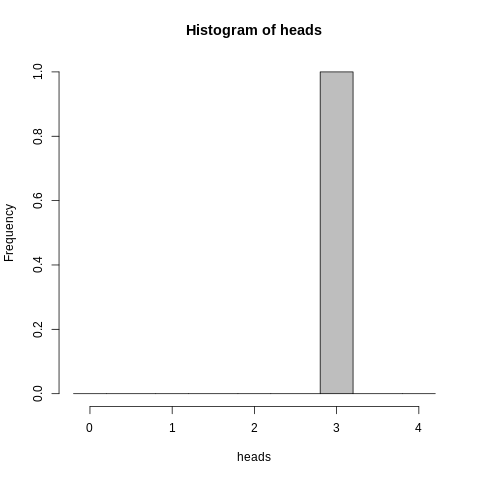

In [0]:
%%R
coins = 4
heads <- rbinom( 1, coins, 0.5 )

breaks = c(-.2,.2)
for (i in 1:coins){
    breaks = c(breaks,i-.2,i+.2)
}

hist( heads, breaks=breaks, col=8, freq=TRUE)



___

Now, lets consider a series of events happening during a fixed period of time. For example: How many scooter accidents will happen today?

What is the process and what is the question?

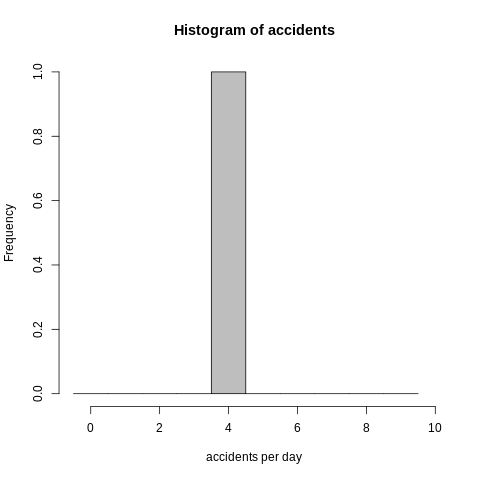

In [0]:
%%R
accidents <- rpois( 1, lambda=5 )

max_lim = (round(max(accidents)/10)+1)*10
hist( accidents , breaks=seq(-.5, max_lim), col=8, xlim=c(-.5, max_lim), xlab="accidents per day")

Observe that the number of accidents can be 0, or it can be many more than we expected. However, on average they will occur at the rate we defined (lambda).

How many accidents are too many accidents?

## The [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
This distribution describes an unknown number of _events_ happening within a _known window_. This window can be of time, space, a combination of both, or anything you can define as a window.

Using the Poisson distribution, you can calculate how likely it is that some (small or large) number of events happens. Example: how likely is it that 10 people have accidents today?

What biological processes can be modelled using Poisson distributions?
Examples:

  - Number of de-novo mutations per offspring.
  - Number of gene transcripts in a cell.

Let's assume that you are planning an RNA-seq experiment. You may interested in the number of transcripts of gene G in a cell under two different conditions: A vs B.

You may want to think beforehand, how many transcripts do you expect to find? How many replicates will you need?

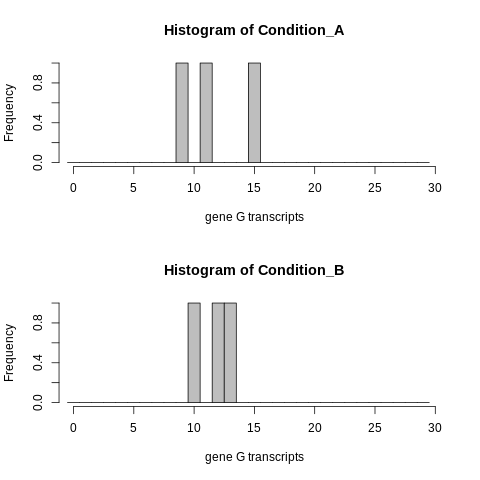

In [0]:
%%R
reps = 3
Condition_A <- rpois( reps, lambda=10 )
Condition_B <- rpois( reps, lambda=15 )

max_lim = (round(max(c(Condition_A,Condition_B))/10)+1)*10
par(mfcol=c(2,1))
hist( Condition_A , breaks=seq(-.5, max_lim), col=8, xlim=c(0, max_lim) ,xlab="gene G transcripts")
hist( Condition_B , breaks=seq(-.5, max_lim), col=8, xlim=c(0, max_lim) ,xlab="gene G transcripts")


___
Notice that all the distributions we have mentioned are designed for discrete numbers (or counts), and have very intuitive ways to think about the average of the distribution. What happens when you are not interested in counts, but in a real number?

## The [Uniform Distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
This distribution describes a process where you only know the range of possible events, but don't have any information about relative frequencies of events over that range. These distributions are commonly thought of as not having any information, or "flat".

You can think of it in this way: any element (segment) drawn from a uniform distribution, has the exact same probability of being observed, as does any other element of the distribution.

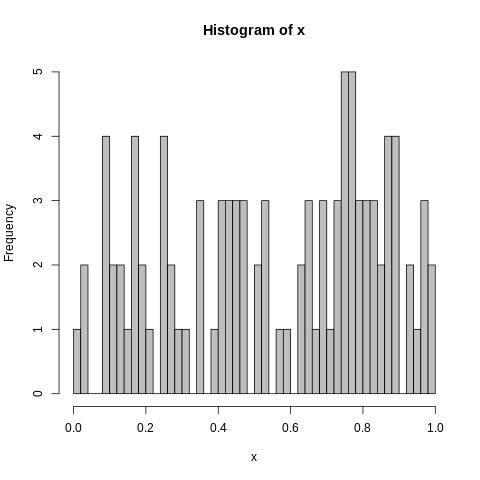

In [0]:
%%R
x <- runif( 100 ,0,1)

hist( x, breaks=seq(0,1,1/50), col=8, xlim=c(0,1))

Observe that when the sample is small (100s), some modes may arise by chance. But with larger samples (10Ms), you get the flat distribution.


___
## The [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
This may be the most commonly used distribution. It describes what happens when many independent, underlying processes affect one measurement.

Think of the variation observed in some trait, for example height. Height is affected by many underlying processes of which we know very little. Each one of those effects will happen to an individual independent of the other effects.

If we dont know anything about those processes and any individual is equally likely to be affected by them, independent of the other processes. We _could_ model such an outcome by adding many uniform distributions together:

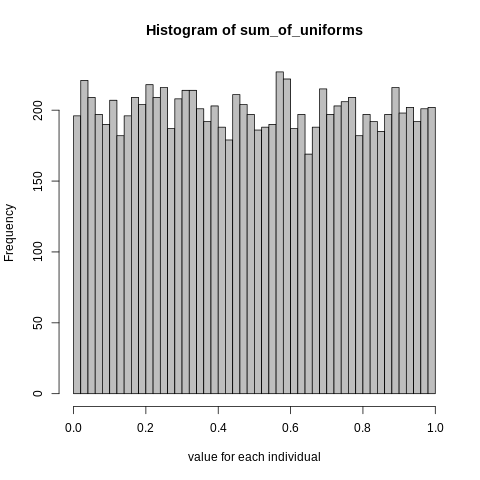

In [0]:
%%R
add_uniforms <- function( num_unif=2, sample_size=1000 ,x1=0, x2=1, normalize=FALSE)
{
	matrix_of_uniforms = matrix( nrow=sample_size, ncol=num_unif)

  for (i in 1:num_unif){
		matrix_of_uniforms[,i] =  runif(sample_size ,x1,x2)
	}
  sum_of_uniforms = apply( matrix_of_uniforms, 1, sum)

  if (normalize){
	  sum_of_uniforms = (sum_of_uniforms - mean(sum_of_uniforms))/sd(sum_of_uniforms)
	}
	hist( sum_of_uniforms, 50, col=8, xlab="value for each individual")
}

add_uniforms(1, 10000, normalize=FALSE)

Observe that some individuals will have many underlying effects (from the uniforms) in one direction, making them higher than average, and some individuals will have many underlying effects in the opposite direction, making them shorter than average. But most individuals will have a combination of effects in both directions, placing them closer to the average.

# Summary Statistics
Probability theory is useful for the study of well-defined distributions, but it is an idealized world. In the real world we have **Data**. [Data is messy](https://www.scientificamerican.com/article/how-to-get-better-at-embracing-unknowns/) and often large.

How can you comunicate information about data to another person (or to a computer), without sharing **all of it**? How do you learn something about a trait or measurement, without listing all the observations? In other words, how do we summarize data and draw conclusion from it?

There are two approaches to summarizing data: one visual, often for communication with other humans, and one numerical, for quatitative study. We will talk about plotting later, for now lets focus on the numerical ways.
One _generally good_ way to summarize data was developed by John Tukey (1915-2000). It's called the [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary), and its visual equivalent: the [box plot](https://en.wikipedia.org/wiki/Box_plot).


<center><img src="http://cast.massey.ac.nz/core/en/boxPlot/images/s_boxPlotDefn.gif" width="480" height="200"/></center>

The five number summary can be applied with _flexibility_ to any list of measures, regardless of their **distribution**.

Probability distributions (and their properties) can also be used to summarize (or represent) data, which makes them extremely powerful!
If a list of values is _assumed to follow some distribution_, it can be described by the **parameters** of that distribution.
Parameters are simply a set of numbers (usually 1 or 2) that are sufficient and necessary for describing the probability distribution of a random variable. Therefore, if data is assumed to be drawn from some _known distribution_, it can be summarized using those parameters.

Bear in mind that the assertion that "some group of data follows some distribution", carries with it a lot of assumptions about the data that is being described. **These assumptions are often NOT met, and the implications of this has to be disclosed and discussed**. However, with enough care, a distribution can be chosen to fit your data, and once this is done, you can use all the tools developed for distributions to analize your data.

Lets think about some data collected from [UCLA undergrads](http://www.admission.ucla.edu/campusprofile.htm). We might be interested in their height (or something different?). And we might convice ourselves that height, in UCLA undergrads, can be represented by a random variable that follows a normal distribution:

$$\text{height}_{ucla} \sim \mathcal{N}(\mu,\sigma^2) $$


[1] "average height:  164.273449929026"


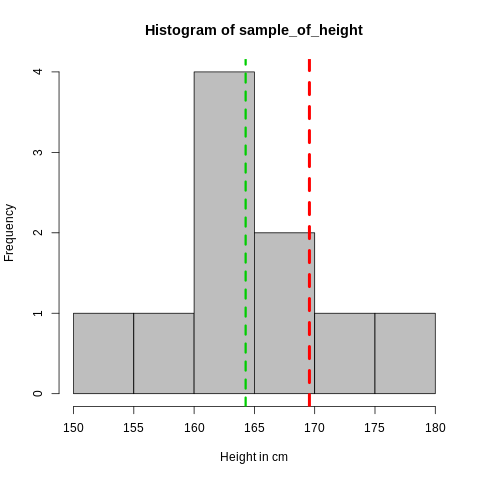

In [0]:
%%R
height_m <- rnorm(15501,162,10)
height_f <- rnorm(15501,177,10)
height_ucla <- c(height_m,height_f)
sample_size = 10
sample_of_height <- sample( height_ucla, sample_size )
hist( sample_of_height, col=8, xlab="Height in cm")
abline(v=mean(height_ucla),col=2,lty=2,lwd=4)
abline(v=mean(sample_of_height),col=3,lty=2,lwd=3)
print(paste("average height: ", mean(sample_of_height)))


Using descriptive statistics, you can calculate what values of $\mu$ and $\sigma^2$ best represent height for UCLA undergrads. Lets see how:

## What is a [statistic](https://en.wikipedia.org/wiki/Statistic)?
A statistic is some function of your data (a sample).

$$f(x_1,x_2,x_3,...,x_n)=y$$

A descriptive statistic will be some _number_ $y$ that is good for describing a set of data. It is often used to learn information (make inferences) about the larger population where your data is coming from.

### Expectation and Variance:

"You can, for example, never foretell what any one man will do, but you *can* say with precision what an average number will be up to. Individuals vary, but percentages remain constant. So says the statistician." - Sherlock Holmes, *The Sign of Four*

_Sir Arthur Conan Doyle, 1890_

Mean: The central tendency. The location of the distribution. If you were to sample infinite times, what to expect? But is it a strong expectation? ...

Variance: Is this average useful? How informative is that mean? How well can you predict the outcome? How much variation is there to be explained?



## What is a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval)?
We saw how we can generate descriptive statistics for samples. Now, how can we use those to learn about populations?
With how much confidence can we describe something about the population, given that we only know the sample?

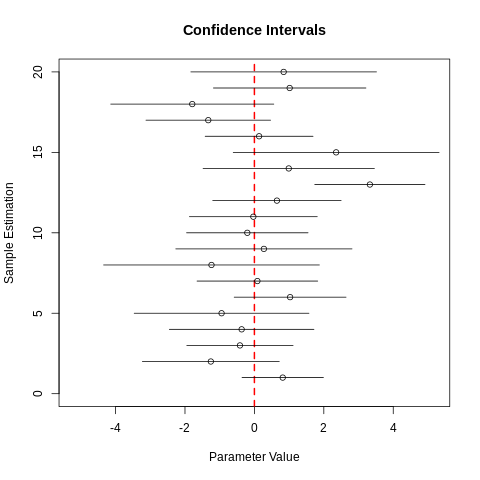

In [0]:
%%R
# The true meaning of a confidence interval
true_mean = 0
true_sd = 4
n=10
reps = 20
confidence = qnorm(0.95)

plot(-1,xlim=c(true_mean-(true_sd*3/log(n)),
               true_mean+(true_sd*3/log(n))),
        ylim=c(0,reps),
     ylab="Sample Estimation",xlab="Parameter Value",main="Confidence Intervals")
abline(v=true_mean,lwd=2,lty=2,col=2)

# estimate and plot confidence intervals (for a normal distribution)
for (i in 1:reps){
  sample <- rnorm(n,true_mean,true_sd)
  statistic <- mean(sample)
  interval <- (confidence * sd(sample)) / sqrt(n)
  segments( x0=statistic-interval, x1=statistic+interval, y0=i)
  points(statistic,i)
}

# Thinking like a statistician

> Statistics - A subject which most statisticians find difficult but which many physicians are experts on. $-$Stephen Senn

We're going to zoom out for a minute here and entertain some big picture thoughts. 

**First** we'll consider some vocabulary and notation, so that you can connect the things you already know with how we talk about them in statistics.

**Second** we'll talk about philosophy of statistics and how that might be different from a more general philosophy of science or biology. 

**Third** we'll connect back to the more practical statistics we've been discussing and talk about the workflow of a statistician. This will bridge the descriptive statistics Juan discussed and the linear modeling that Alex will cover next.

## Writing like a statistician

For the most part, we spend most of our days speaking **natural languages**, which evolved naturally and weren't designed or constructed by people. These languages tend to be ambiguous: words can mean several different things with different nuances. Thus, they are also redundant, like this sentence and the previous clause because "ambiguous" didn't cover the entirety of what I meant to say.

However, math is a **formal language**, as are programming languages. It was designed by people for a specific application. There are strict rules about syntax, semantics, tokens, and structure.

In a natural language, not only do wrong and WRONG and wRoNg mean the same thing, but so do erroneous, false, inaccurate, mistaken, unsound, and untrue. 

In a formal language, each **token**, or the basic elements of the language, is a predefined entity. You can say $3*2=6$ because each of these elements have meaning in math. You can't say $3=+6\$$ because $ is not a mathematical token.

**Structure** refers to the way these tokens are arranged. $3=+6\$$ is also wrong because you can't place a $+$ immediately after an $=$.

**Syntax** is what governs the structure, while **semantics** refers to the meaning. $3+3=9$ is syntactically correct, but semantically incorrect.


### Is statistical writing a formal language?

The answer is unequivocally no.

Statistics is used in many different fields and each field has its own set of terminology and sometimes its own math (looking at you psych stats). Therefore, there are often many synonyms for a single idea and depending on where you've used statistics before, you may be familiar with a different set of terminology than other people you interact with.

However, I want you to expect each new term you encounter in this bootcamp to be a **technical term**.

### Technical terms

This means that while you may have heard these words to mean any number of things, within statistics they mean only one thing and always that one thing.

For example, people say that things are "in their DNA" to mean that those things are an important part of their identity, but the only things we expect to be in our DNA are adenine, thymine, guanine, cytosine, deoxyribose, and phosphate.

It's important to remember, however, that while you may be unfamiliar with the term that we're using, you are probably familiar with the concept it describes.

### You know more than you think you do

$$\frac{1}{n} \sum_{i=1}^{n} x_i$$

### Statistical conventions


*   Greek letters for population values (true/unknown): $\mu$, $\sigma$
*   Roman letters for sample values: $x$, $s$
*   Bar for an average/mean: $\bar{x}$, $\bar{y}$
*   Hat for an estimate: $\hat{\mu}$, $\hat{\sigma}$
*   $\sim$ is distributed: $X \sim N(0,1)$
*   $N(\mu, \sigma^2)$: name of the distribution followed by its parameters
* Indicator function: $\mathbb{1}$ or $\mathbb{I}$

Introduce new letters at your own peril; most letters are shorthand for something. For example, $x, y, z$ often refer to variables, while $a, b, c$ are shorthand for coefficients (remember the standard form of an equation of a line? $ax + by = c$). 

Alex is going to go more into notation, but keep in mind that all of these letters are **TOKENS**, that is to say that they **carry meaning**. If somebody is talking about an $m \times n$ matrix and refers to $i$ and $j$, I know what that means because we don't pick random letters.

I know it seems arbitrary and it is. However, the point of languages is communication and by agreeing on these arbitrary conventions, it is much easier to understand each other.

## Reasoning like a statistician

Statistics is often seen as a tool or a method to those operating outside of the discipline. However, there is active research into the philosophy of statistics (and you could even get a doctorate of philosophy in statistics!), which we are not going to cover today.

Instead, we are going to touch on the idea of being wrong and how it is approached within the larger scientific community as contrasted with within the philosophy of statistics.



### Karl Popper and falsifiability

Karl Popper (1902-1994) was a philosopher who is best known for his idea of empirical falsification. This states that for an idea to be scientific, it must be falsifiable, i.e. capable of being proven false.

This framework dictates that scientific ideas cannot be proven true, but they can be proven false. Therefore, we design experiments by positing a hypothesis and trying to disprove the hypothesis; if we cannot disprove it, the theory stands.



### Isaac Asimov and the relativity of wrong

Isaac Asimov (1920-1992) was a science fiction writer, but also a biochemistry professor with a PhD in chemistry.

One of his essays, [The Relativity of Wrong](https://hermiene.net/essays-trans/relativity_of_wrong.html), is written as a response to a letter from a reader instructing him that "the one thing we can say about our modern "knowledge" is that it is wrong."

His response is the entirety of the essay, but can be summed with this introduction:

> My answer to him was, "John, when people thought the Earth was flat, they were wrong. When people thought the Earth was spherical, they were wrong. But if *you* think that thinking the Earth is spherical is *just as wrong* as thinking the Earth is flat, then your view is wronger than both of them put together."
>
> The basic trouble, you see, is that people think that "right" and "wrong" are absolute; that everything that isn't perfectly and completely right is totally and equally wrong.

This is a good summation of what it means to be wrong in science. Asimov goes on to say, "Theories are not so much wrong as incomplete." The understanding is that we try to be as correct as possible and as we learn that we're wrong, we update and adopt the better view.

### George Box and "all models are wrong"

George Box (1919-2013) was a statistician who is best known for this quote, but who also contributed significantly to time-series analysis.

> Now it would be very remarkable if any system existing in the real world could be exactly represented by any simple model. However, cunningly chosen parsimonious models often do provide remarkably useful approximations. For example, the law $PV = RT$ relating pressure $P$, volume $V$ and temperature $T$ of an "ideal" gas via a constant $R$ is not exactly true for any real gas, but it frequently provides a useful approximation and furthermore its structure is informative since it springs from a physical view of the behavior of gas molecules.
>
> For such a model there is no need to ask the question "Is the model true?". If "truth" is to be the "whole truth" the answer must be "No". The only question of interest is "Is the model illuminating and useful?".

How does Box's idea of a model contrast with Popper's idea of a hypothesis? Do Box and Asimov agree on what it means to be wrong?

### How to think about assumptions

> All models are approximations. Assumptions, whether implied or clearly stated, are never exactly true. All models are wrong, but some models are useful. So the question you need to ask is not "Is the model true?" (it never is) but "Is the model good enough for this particular application?"

What are some models that are wrong, but useful?

* weather forecasting
* maps

What "assumptions" do you need to make of a weather forecast for it to be useful? In order to know if you need an umbrella tomorrow, you need to know:

* that the forecast is for tomorrow
* in LA
* and includes rain information

If even just one of those isn't true, the forecast is useless. It may not be wrong; it's quite likely it's going to rain in Seattle tomorrow, but it's not useful.

It is important to note that **statistical software does not check assumptions for you**. We're going to cover common statistical assumptions tomorrow, but I need to reiterate this a lot.

## Working like a statistician

We're going to go through a typical workflow for statistical data analysis. By that I mean the general tasks that you would complete after receiving a dataset and the general order in which you would do them. I don't mean a script or package that you can download and run (but sometimes this is what people mean by workflow).

As we go along, we'll talk about key concepts and definitions and we'll start putting together the ideas that underlie the statistics you'll most likely be interacting with for the rest of your career: hypothesis testing.

### Descriptive statistics

So far we have covered *descriptive* statistics. As the name implies, they describe the data.



### What is inference?

### Hypothesis testing

### p-values

### Parametric vs. non-parametric statistics

In [0]:
%%R
install.packages("Hmisc")

library(Hmisc)
library(tidyverse)

demographics <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.XPT") %>% 
  select(id=seqn,gender=riagendr,age=ridageyr) %>% 
  mutate(gender=recode(as.factor(gender), "1"="male","2"="female"))

taste.smell <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/CSX_H.XPT") %>% 
  select(id=seqn,runny=csq260n,choc=csxchood) %>% 
  mutate(runny=replace(runny,is.na(runny),0) %>% 
           as.factor %>% 
           recode("1"="yes","0"="no"),
         choc=recode(as.factor(choc),"1"="Lemon", "2"="Chocolate", 
                                        "3"="Smoke","4"="Black pepper"))

smoker <-  sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/SMQ_H.XPT") %>% 
  select(id=seqn,ever.smoker=smq020,curr.smoker=smq040,age.smoke=smd030) %>% 
  mutate(ever.smoker=recode(as.factor(ever.smoker), "1"="yes","2"="no","9"="don't know"),
         curr.smoker=replace(curr.smoker,is.na(curr.smoker),0) %>%
           as.factor %>% 
           recode("1"="Every day",	"2"="Some days","3"="Not at all", "0"="Never"))

secondhand <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/SMQFAM_H.XPT") %>% 
  select(id=seqn,num.smokers=smd470) 
  
smellquest <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/CSQ_H.XPT") %>% 
  select(id=seqn,nas.congest=csq204,broke.nose=csq250) %>% 
  mutate(nas.congest=recode(as.factor(nas.congest),"1"="yes","2"="no"),
         broke.nose=recode(as.factor(broke.nose), "1"="yes","2"="no"))

medcon <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/MCQ_H.XPT") %>% 
  select(id=seqn,ever.asth=mcq010,cur.asth=mcq035) %>% 
  mutate(ever.asth=recode(as.factor(ever.asth),"1"="yes","2"="no"),
    cur.asth= replace(cur.asth,is.na(cur.asth),0) %>% 
           as.factor %>% 
           recode("1"="yes","2"="no","0"="no"))

blood <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/PBCD_H.XPT") %>% 
  select(id=seqn, lead=lbxbpb, mercury=lbxthg)

body.meas <- sasxport.get("http://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BMX_H.XPT") %>% 
  select(id=seqn, weight=bmxwt, height=bmxht)

full.dat <- left_join(demographics, taste.smell, by = "id") %>% 
  left_join(smoker, by = "id") %>% 
  left_join(secondhand, by = "id") %>% 
  left_join(smellquest, by = "id") %>% 
  left_join(medcon, by = "id") %>% 
  left_join(blood, by = "id") %>% 
  left_join(body.meas, by ="id")

rm.nas <- full.dat %>% 
  filter(!is.na(ever.smoker)) %>% 
  mutate(age.smoke=replace(age.smoke,age.smoke==999 | age.smoke==0,NA)) %>% 
  mutate(nas.congest=recode(nas.congest,"9"=NA),
         broke.nose=recode(broke.nose, "9"=NA),
         ever.asth=recode(ever.asth, "7"=NA,"9"=NA),
         cur.asth=recode(cur.asth, "9"=NA))


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/checkmate_1.9.4.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 214038 bytes (209 KB)

  warnings.warn(x, RRuntimeWarning)
/u

Processing SAS dataset DEMO_H 	 ..
Processing SAS dataset CSX_H 	 ..
Processing SAS dataset SMQ_H 	 ..
Processing SAS dataset SMQFAM_H 	 ..
Processing SAS dataset CSQ_H 	 ..
Processing SAS dataset MCQ_H 	 ..
Processing SAS dataset PBCD_H 	 ..
Processing SAS dataset BMX_H 	 ..


In [0]:
%%R
install.packages("skimr")
library(skimr)

skim(full.dat)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependency ‘pander’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/pander_0.6.3.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 378284 bytes (369 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 369 KB


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/skimr_1.0.7.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 730379 bytes (713 KB)

  warnings.warn(x, RR

Skim summary statistics
 n obs: 10175 
 n variables: 17 

── Variable type:factor ────────────────────────────────────────────────────────
    variable missing complete     n n_unique
  broke.nose    6360     3815 10175        3
        choc    6648     3527 10175        4
    cur.asth     405     9770 10175        3
 curr.smoker    3007     7168 10175        4
   ever.asth     406     9769 10175        4
 ever.smoker    4062     6113 10175        3
      gender       0    10175 10175        2
 nas.congest    6360     3815 10175        3
       runny    6467     3708 10175        2
                               top_counts ordered
       NA: 6360, no: 3271, yes: 538, 9: 6   FALSE
  NA: 6648, Cho: 2901, Smo: 356, Bla: 150   FALSE
       no: 8814, yes: 939, NA: 405, 9: 17   FALSE
 Nev: 4589, NA: 3007, Not: 1347, Eve: 992   FALSE
       no: 8222, yes: 1538, NA: 406, 9: 8   FALSE
    NA: 4062, no: 3532, yes: 2579, don: 2   FALSE
              fem: 5172, mal: 5003, NA: 0   FALSE
      NA: 6

In [0]:
%%R

skim(rm.nas)

Skim summary statistics
 n obs: 6113 
 n variables: 17 

── Variable type:factor ────────────────────────────────────────────────────────
    variable missing complete    n n_unique
        choc    2586     3527 6113        4
 curr.smoker       0     6113 6113        4
 ever.smoker       0     6113 6113        3
      gender       0     6113 6113        2
       runny    2405     3708 6113        2
                               top_counts ordered
  Cho: 2901, NA: 2586, Smo: 356, Bla: 150   FALSE
 Nev: 3534, Not: 1347, Eve: 992, Som: 240   FALSE
       no: 3532, yes: 2579, don: 2, NA: 0   FALSE
              fem: 3197, mal: 2916, NA: 0   FALSE
             no: 3287, NA: 2405, yes: 421   FALSE

── Variable type:integer ───────────────────────────────────────────────────────
    variable missing complete    n     mean      sd    p0   p25   p50   p75
         age       0     6113 6113    47.39   18.47    18    32    47    62
   age.smoke    3665     2448 6113    17.98    5.3      7    15 

# Linear models & L.A.
(The other L.A. -- linear algebra!)


## On the notation of higher dimensions:

Some time in the 1930s, Edgar Anderson collected data on three types of closely related iris flowers to quantify the variation between species.

For each flower, he recorded three measurements. We call this collection of measurements a vector, $\mathbf{y}$:

$$
\mathbf{y} = \begin{bmatrix}
        y_1 \text{(length of petal)} \\
        y_2 \text{(length of sepal)}\\
        y_3 \text{(width of sepal)}
      \end{bmatrix}
$$
Ronald Fisher published this data in 1936 in a paper titled *The use of multiple measurements in taxonomic problems* and so this data set has come to be known as [Fisher's/Anderson's iris flower data](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Bold lower case letters, such as $\mathbf{y}$ represent **vectors** and hold collections of individual numbers.

An individual number (a.k.a. a **scalar**) is denoted by a lower case english or greek letter with a subscript, e.g.

*   $y_1$ is a number
*   $\beta_5$ ("beta 5'') is a number.
*   $\epsilon_2$ ("epsilon 2") is a number.

Vectors can be written either vertically (a "column" vector) like above, or horizontally, like the "row" vector:
$$
    \mathbf{y} ^T = \{ y_1 , y_2, y_3, \ldots, y_n\}.
 $$
Typically, the default is to write a vector as a column vector. Row vector equivalents are written with a small 'T' superscript indicating the vector has been **T**ransposed.

<img src="http://media.getty.edu/museum/images/web/enlarge/00094701.jpg" width="600" height="500" />

van Gogh's irises, you can see the original at [the Getty museum](http://www.getty.edu/art/collection/objects/826/vincent-van-gogh-irises-dutch-1889/) here in L.A. !

Each $n$-dimensional vector represents a point in $n$ dimensional space.

Let's visualize the Edgar's data in three-dimensional space.

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/scatterplot3d_0.3-41.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 460912 bytes (450 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/pyth

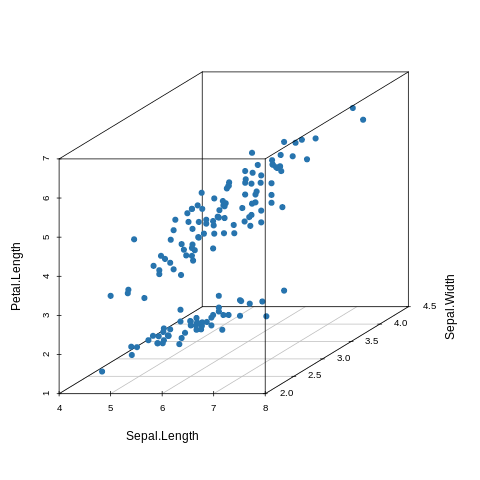

In [0]:
%%R
install.packages("scatterplot3d"); # install pkg with 3d plotting function
require(scatterplot3d); # load pkg
uclaBlue = rgb(matrix(c(39/255, 116/255, 174/255), ncol = 3, nrow = 1)) # make UCLA blue from RBG values
scatterplot3d(iris[,1:3], pch = 19, color=uclaBlue) 

When we have many observations, as in the iris data set displayed above, we collect each vector of observations into a **matrix**. Matrices are collections of vectors and are represented by capital letters, e.g.

$$
X = \begin{bmatrix}
    5.1 & 3.5 & 1.4\\
    4.9 & 3.0 & 1.4\\
    4.7 & 3.2 & 1.3\\
    4.6 & 3.1 & 1.5
  \end{bmatrix}
$$

$X$ is a "4 x 3" (read: "four by three") matrix, meaning it has 4 rows and 3 columns. It can be viewed as a collection of three column vectors, or more typical for our purposes, as a collection of four row vectors. 

The above matrix represents four different iris flower measurements:


 



In [0]:
%%R
# print to screen the annotated matrix:
iris[1:4,1:3]
# ?iris # to learn more about the iris data set, (there are 5 observations in all!)

  Sepal.Length Sepal.Width Petal.Length
1          5.1         3.5          1.4
2          4.9         3.0          1.4
3          4.7         3.2          1.3
4          4.6         3.1          1.5


___

**"Great things are done by a series of small things brought together." -Vincent van Gogh**

And so we proceed with the first of many small things...
## Some vocabulary

**Linear regression** is a simple way to mathematically model the relationship between two or more observed phenomena. 

Ex: age, height

We always designate one, and only one of our observations to be the **outcome variable** although you may also hear it referred to as the `response`, `dependent variable` or even simply $\mathbf{y}$.
All other observations are termed **predictors** although you may also hear them referred to as the `independent variables`, `regressors`, `covariates`, `features`, `the data`, or even "the $X$ matrix", but we'll get to that later.

To make this idea a little more concrete, let's consider a real world example. Professor X tells you more [mutants](https://en.wikipedia.org/wiki/Mutant_(Marvel_Comics)) are popping up all over the world and it's his job to help them. Mutants possess a genetic trait called the "X-gene" that gives them super-human abilities that manifest during puberty. Unfortunately, the professor explains, discretely genotyping thousands of potential mutants is expensive and so he would like you to put together a model to help him identify young mutant's "mutant factor" without genetic testing. The professor tells you his theory that most mutants undergo traumatic events as children and have high exposure to carcinogens such as those present in cigarette smoke. Note: mutant factors above 1 indicate mutant status.

In order to make predictions about a person's mutant status, you set up a **linear model**.

$$
\beta_1 \mathbb{1}_{\{\text{traumatic event}\}} + \beta_2 \frac{\text{no. of cigarettes}}{\text{day}} + \beta_3 + \epsilon_1 = \text{mutant-factor}
$$

where $\beta_1$, $\beta_2$ and $\beta_3$ are coefficients, just numbers, that you are interested in learning about. (We'll talk about epsilon in a bit). Importantly, it's the $\beta$'s themselves that are **linear**. The "linear'' in "linear regression" refers to the fact that we are interested in predicting some outcome variable by taking a [**linear combination**](https://en.wikipedia.org/wiki/Linear_combination) of predictors. 

Let's pause a moment and contemplate. We are looking at three measurements: presence of traumatic event, no. of cigarettes per day and mutant factor. Since there are three, we can visualize this matrix of observations in three dimensional space. But what does a linear equation "look" like?

Before moving to the 3D code...let's think about 1-D and 2-D on the board. 

*   Thinking point #1: Dimensionality refers to the number of axes in which you can move.
*   Thinking point #2: a linear equation generates an $n-1$ dimensional object. 

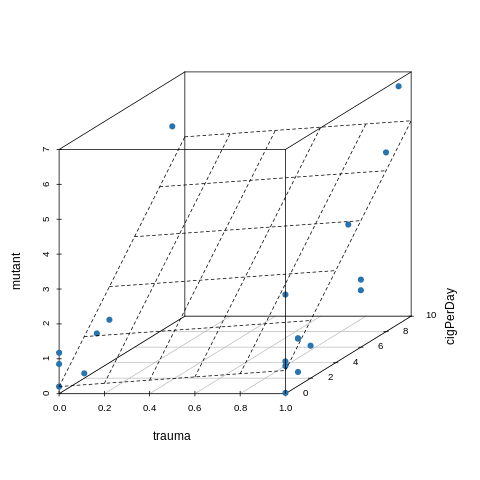

In [0]:
%%R
# Previous data kindly supplied to us by Professor X:
set.seed(6)
N = 20 # no. of individuals under study
trauma = rbinom(N, 1, .5) # 1 for trauma, 0 for no trauma
cigPerDay = floor(rexp(N,.25)) #floor rounds down to the nearest whole number
beta = c(.5, .07, 0)

mutant = abs(beta[1]*trauma + beta[2]*(cigPerDay^2) + beta[3] + rnorm(N, 0, 1))

plot3d = scatterplot3d(trauma, cigPerDay, mutant, pch = 19, color=uclaBlue)
model  = lm(mutant ~ trauma + cigPerDay)
plot3d$plane3d(model)
# length(which(mutant>1))
# sum((model$residuals)^2)

It turns out that a linear model states that we believe there is some [**hyperplane**](https://en.wikipedia.org/wiki/Hyperplane) that adequately describes the geometric relationship between predictors and outcomes.

What if we believe the relationship we believe the model is slightly different, say:

$$
\beta_1 1_{\text{traumatic event}} + \beta_2 \left( \frac{\text{no. of cigarettes}}{\text{day}} \right)^2 + \beta_3 + \epsilon_1 = \text{mutant-factor}
$$

What changed? Is this still a linear model? 

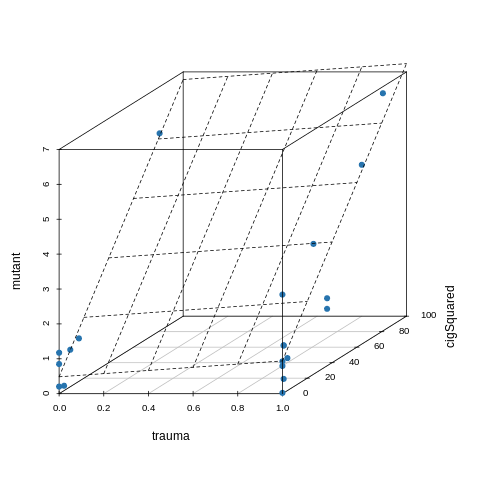

In [0]:
%%R
cigSquared = cigPerDay^2
plot3d = scatterplot3d(trauma, cigSquared, mutant, pch = 19, color=uclaBlue)

model  = lm(mutant ~ trauma + cigSquared)
plot3d$plane3d(model)
# sum((model$residuals)^2)

What changed was $\underline{\text{the axes}}$. 
____

## What about $\epsilon$ ?

As discussed earlier, no model is perfect, even the best are not true representations of reality. There are simply some things we cannot account for. For example, does the individual have a family history of mutants? Have they been exposed to high levels of radiation in their life time? Do we believe the data we did acquire? Was the number of cigarettes smoked per day self-reported?

In any event, we don't know the whole picture -- there is always something unnacounted for that is affecting our outcome variable. To deal with this extra bit of unobserved nonsense or noise, we lump  it all together and call it "$\epsilon$" (read:"epsilon"). We say $\epsilon$ is a random variable with some distribution. 

The most elementary assumption (and still often a useful one) is that 
$$
\epsilon_i \sim N(0, 1)
$$

i.e. the noise the $i$th observation is normally distributed with mean $0$ and variance $1$.
____

## Rewrite the model

We have the model 
$$
\beta_1 1_{\text{traumatic event}} + \beta_2 \left( \frac{\text{no. of cigarettes}}{\text{day}} \right)^2 + \beta_3 + \epsilon_1 = \text{mutant-factor}
$$

but it is somewhat cumbersome to write.

The first order of business is to rewrite the model in a succint, generalizable fashion.

We can begin generalizing by renaming the predictors to "$x_1$" and "$x_2$" and by labeling the outcome variable "$y$". This notation is standard. 

$$
\beta_1 x_1 + \beta_2 x_2 + \beta_3 + \epsilon_1 = y_1
$$

As we are using all subscripts, the above equation describes a single observation. We can collect our predictors $x_1$ and $x_2$ into a data matrix $X$ using matrix-vector notation.

$$
X \beta + \epsilon = \mathbf{y}
$$

Did I lose you? Let's take a look a closer look on the board.



*   Thinking point #1: matrix vector form is a **system of linear equations**



## Hunt for the hyperplane!

Our model describes the process (a.k.a. the "data generative process") that we believe generates mutant factors. In summary, we believe it mainly has to do with trauma and cigarettes. The rest is epsilon to us. 

To build our model, we start with $X$ and $\mathbf{y}$. We know $X$. We know $\mathbf{y}$. We have a description for $\epsilon$'s distribution. What we don't know and want to estimate is $\beta$. If our model is correct, (and it's not, but suspend disbelief for now!) then $\beta$ has some true value that is unknown to us. In order to distinguish our estimate for $\beta$ from the true value, we will give **our estimate** a new name: "beta hat", $\hat{\beta}$, (because it wears a hat).

The actual "model" model that we will use for making future predictions about mutants is
$$
\mathbf{\hat{y}} = X \hat{\beta}
$$

Guess why we have the hat on $\mathbf{y}$! (Because it's our predicted outcome, not the actual outcome)

How do we find $\hat{\beta}$?

By choosing an **objective function**.
An objective function is some criteria we care about minimizing or maximizing (in other words, "optimizing") and it's what makes one hyperplane better than all the rest.

Let's turn our attention to one common objective function known as "least squares".


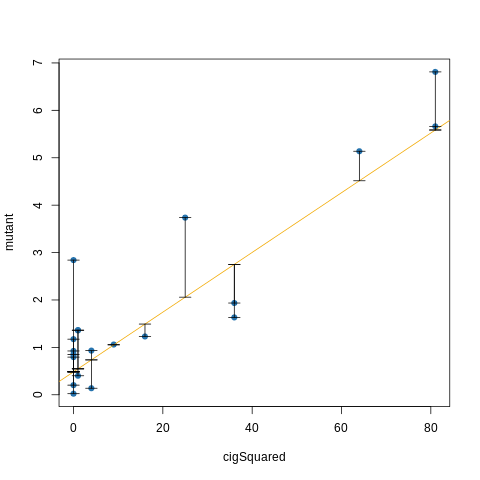

In [0]:
%%R
# example where we ignore the "trauma" dimension.
plot(cigSquared, mutant, pch=19, col = uclaBlue) # plot points

# set beta_hat and mutant_hat
beta_hat = rev(model$coefficients) 
mutant_hat = cigSquared*beta_hat[1] + beta_hat[3]
westWoodGold = rgb(matrix(c(242/255, 169/255, 0), ncol = 3, nrow = 1))
abline(beta_hat[3], beta_hat[1], col = westWoodGold) # add regression line
arrows(cigSquared, mutant, cigSquared, mutant_hat, length=0.08, angle=90, code=3) # add error lines

#beta_hat


Each vertical line is known as an error bar and shows the residual error, $\epsilon$. In other words each vertical line displays the difference between our prediction, $\hat{y} = X \hat{\beta}$, and our observations: $y = X \beta + \epsilon$.

Naturally, we wish to minimize the error in our prediction. How might we formulate our desire mathematically? We could try to minimize $\sum_{i=1}^n \epsilon_i$, but if we think about it, this will not work well. Why? Because large positive errors will offset large negative errors to yield an overall *small* sum of errors. One remedy that arises is to minimize $\sum_{i=1}^n | \epsilon_i |$, and this is a viable option known as least absolute value (LAV) regression. Here, however, we will unpack the canonical "least squares" method. It is important to understand that we must $\underline{\text{choose}}$ the objective function that we want to optimize.

The least squares objective function:
$$
\sum_{i=1}^n \epsilon_i ^2 = \left( y_i - x_1 \beta_1 - x_2 \beta_2 - \ldots - x_n \beta_n 
- \beta_{n+1} \right)^2
$$
is known as the **residual sum of squares** but you may also see it called the "sum of squared residuals". What do we know in the above equation? What are we trying to "optimize over"? How do you think we would write this in vector notation?

### Solution


$$
\epsilon ^ T \epsilon = \left( \mathbf{y} - X \beta \right) ^ T \left( \mathbf{y} - X \beta \right)
$$

### $\hat{\beta}$ 

It turns out that the residual sum of squares can be optimized analytically (that is, on pen and paper) using techniques from calculus. Take a look at the [appendix](#scrollTo=JLwIM1z6zytp) if you want to see the details of the derivation. Here we present the important part, the result:

$$
\hat{\beta} = (X ^T X)^{-1} X ^T y
$$

How does this connect with the hyperplane we found in R?

In [0]:
%%R
cat(c("coefficients generated from R's lm function:\n", beta_hat)) # prints the coefficients from using the built in R machinery for multiple linear regression.

vector_of_ones = rep(1,N) # creates a column vector of 1s, why is this in our X matrix? Hint: multiply it out.
X = matrix(c(cigSquared, trauma, vector_of_ones), ncol = 3, nrow = N, byrow = FALSE) # create data matrix X where first two columns are observations
y = mutant # our outcome variable

test_beta_hat = solve(t(X) %*% X) %*% t(X) %*% y # our formula above, directly written in R-code
cat(c("\n \n coefficients generated using analytic formula:\n", t(test_beta_hat)))


coefficients generated from R's lm function:
 0.0629765356927361 0.455086022826997 0.484013974058961
 
 coefficients generated using analytic formula:
 0.0629765356927361 0.455086022826996 0.484013974058961

## Linear regression summary
So to summarize the technique of linear regression:

Linear regression finds estimates ($\hat{\beta}$) for coefficients $\beta$ in order to find the hyperplane that "best" describes the observed outcome variable $y$ using observed predictor variables $X$, even in the presence of some random noise (error) $\epsilon$.




*   Thinking point #1: thoughts on limitations?



# Assumptions

## Independence
Observing (sampling) one individual (realization of the RV) does not affect the probability of observing any other individual.

Good example: the sex of the first child has no effect on the sex of the second child.

Probability of observing both is simply the product of the probability of observing each one. They are "orthogonal".

What happens with time-series data?

## Identically Distributed
Each observation (individual) comes from the exact same underlying distribution.

## Causality
$$ Y \leftarrow X $$

## Confounding 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Simple_Confounding_Case.svg/200px-Simple_Confounding_Case.svg.png" width="80" height="80"/> </center>

## Measurement
You are measuring the right thing, AND that your measure is accurate. 

Measurements can be biased:
* if the probability of observing something is correlated with the measure. 
* If the instruments are not calibrated correctly
* If your definition of the object being measured is off

Measurements can be noisy:
* If the object being measured is hard to define (a common solution to this problem is factor analysis)
* If the instrument is imperfect

## Normality
Assuming a normal distribution from a set of measurements is too frequently done. It simplifies analysis downstream (the Normal distribution is very easy to work with), but abusing this assumption will leave many observations unexplained, or lead to erroneous conclusions.

## Validity 
The sample you are observing is representative of the population that is being studied. And therefore the conclusions drawn from this sample apply to the general population (Generalization). Basically, you can predict how the next sample will look like from this sample (replicability).

It is usually fine to Interpolate. This means that if you are studying a phenomenon that happens withing some defined space, your model will work well withing that space. But outside of that space you are Extrapolating, and there is no guarantee that your model will perform well in uncharted territory.

## And [many](https://en.wikipedia.org/wiki/Misuse_of_statistics) more...

# Plotting
Plotting should help you explore and communicate data. It is a simple way to identify obvious patterns and define the hypothesis to be tested. It should be treated as a _careful craft_. Failing to put enough time and effort in your visualizations can lead to a lot of confusion, and event to make the wrong assumptions.
You should choose your favorite plotting libraries in Python ([matplotlib](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b) and [seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)) or R [(ggplot2)](https://github.com/rstudio/cheatsheets/raw/master/data-visualization-2.1.pdf)


# Classification [Performance Metrics](https://classeval.wordpress.com/introduction/)

 | Prediction   | Negatives      | Positives      |
 | :---         | :---:          | :---:          |
 | **Negative** | True Negative  | False Negative |
 | **Positive** | False Positive | True Positive  |

<center><img src="https://classeval.files.wordpress.com/2015/06/four-outcomes-of-classifier.png?w=480&h=202" width="480" height="200"/></center>

Accuracy: $$\frac{TP + TN}{TP + FP + TN + FN}$$

Precission: $$\frac{TP}{TP + FP}$$

Recall or Sensitivity: $$\frac{TP}{TP + FN}$$

Specificity: $$\frac{TN}{TN + FP}$$

F1-score: $$\frac{2 * (Precision * Recall)}{Precision + Recall}$$

**Area Under the ROC curve (AUROC):**

<center><img src="https://cdn-images-1.medium.com/max/800/1*OBZ6Z1_i_iF9qj4R6I4eUA.png" width="300" height="400" /></center>

**Precision-Recall curve:**

<center>
<img src="https://classeval.files.wordpress.com/2015/06/two-precision-recall-curves.png?w=260&h=260" width="282" height="282"/>
<img src="https://classeval.files.wordpress.com/2015/06/evaluation-measures-for-precision-recall.png?w=460&h=282" width="460" height="282"/></center>



# Logistic regression

What if we wish to predict a binary outcome $y$? For example, we simply want to predict whether someone *is* a mutant or not. It is easy to see that least-squares linear regression will provide an inadequate model because the codomain will extends over the entire real line. In this situation we may turn to **linear logistic regression**, a typical model used to predict binary outcomes, $y_i = 0$ or $y_i = 1$.

In linear logistic regression (also simply called "logistic regression"), a model is developed that prescribes to a set of predictors a probability for a binary outcome variable. The probability is related to the predictors via a **sigmoid link function**,
\begin{equation}
\newcommand{\exponential}[1]{\text{exp}\{{#1}\}}
p(y_i = 1) = \frac{1}{1+\exponential{-x ^T \beta}},
\end{equation}
whose codomain is $(0,1)$. In this modeling scheme, one typically finds $\hat{\beta}$ by maximizing the **likelihood function**, (another objective function), typically written: $L(\beta \ | \ X)$.




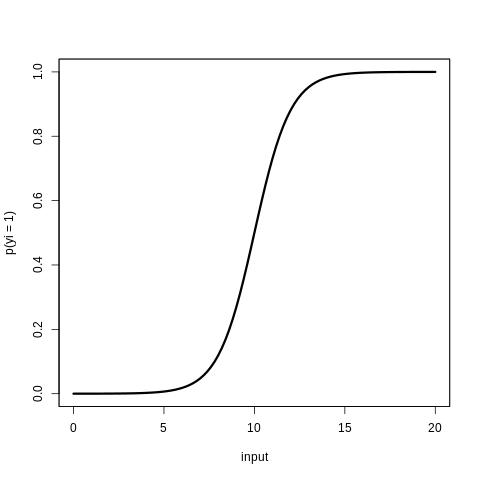

In [0]:
%%R
sigmoid = function(x) 1 / (1 + exp(-x + 10))
plot.function(sigmoid, from = 0, to = 20, n = 101, ylab="p(yi = 1)", xlab="input", lwd = 3)
box()

* Our goal in logistic regression is to build this predictive model.

* Importantly, since all information from the data comes into the model via the term $x ^T \beta$, we still call this a "linear model". 

There is a natural boundary along which we make our classification decision: $p(y_i) = 0.5$. This is a nice and intuitive default boundary for classification, however, you can choose to adjust this boundary. Why might you want to do that?

* Ex: spam filter, any others?

Let's choose a boundary of $0.5$, and see what happens.

* We are still drawing a hyperplane --only now, we view this hyperplane as a decision boundary. 

We recognize the fact that a hyperplane separates the whole space into two distinct regions.

## Odds ratio

The **odds ratio** is 
\begin{equation}
\frac{p_i}{1-p_i}
\end{equation}
where $p_i \in [0,1]$ is the probability $y_i = 1$. It can be thought of as the probability of success divided by the probability of failure (or vice versa).

Importantly, this relates to logistic regression directly via some algebraic manipulation:

\begin{equation}
\newcommand{\exponential}[1]{\text{exp}\{{#1}\}}
\begin{aligned}
p_i &= \frac{1}{1+\exponential{-x ^T \beta}}
\frac{\exponential{x ^T \beta}}{\exponential{x ^T \beta}}\\
p_i \cdot \exponential{x ^T \beta} + p_i &= \exponential{x ^T \beta}\\
p_i &= (1-p_i) \cdot \exponential{x ^T \beta}\\
\frac{p_i}{1-p_i} &= \exponential{x ^T \beta}\\
\text{log} \left( \frac{p_i}{1-p_i} \right) &= x ^T \beta
\end{aligned}
\end{equation}

The log-odds is called the **logit** function




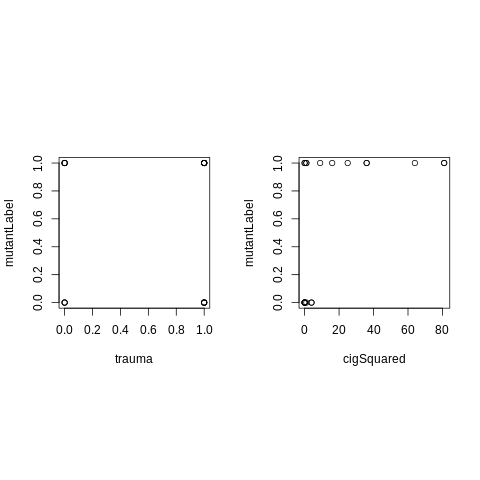

In [0]:
%%R
# label mutants as those with mutant factor above 1:
mutantLabel = vector(length=length(mutant))
mutantLabel[which(mutant>1)] = 1
mutantLabel[which(mutant<1)] = 0

#examine the data:
par(mfrow=c(1,2), pty = 's') # plot in 1 row with 2 columns and make axes 'square'
plot(trauma, mutantLabel)
plot(cigSquared, mutantLabel)

Looking at a single predictor paired with the outcome variable provides little insight into whether or not we will benefit from dividing the space via a hyperplane. Instead, let's look at our predictors:

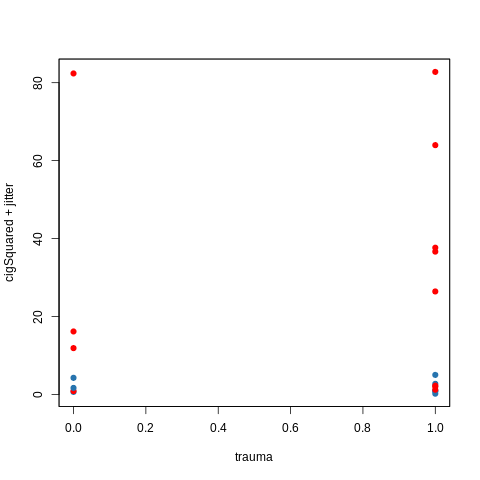

In [0]:
%%R
# for visualization purposes:
# jitter = rep(0,20) # no jitter
jitter = rnorm(20,1,1) # jitter
plot(trauma, cigSquared + jitter, pch = 19, col = ifelse(mutantLabel==1, "red", uclaBlue)) #plot (trauma, cigSquared) colored by outcome.
box()

Ultimately, we want to draw a hyperplane in the above diagram that serves as a boundary between mutants and non-mutants.

In [0]:
%%R
logitModel = glm(mutantLabel ~ trauma + cigSquared, family=binomial(link="logit"))
betaHat = logitModel$coefficients
betaHat

(Intercept)      trauma  cigSquared 
 -0.9864974   0.2659707   0.2350055 


number of wrong predictions =  5

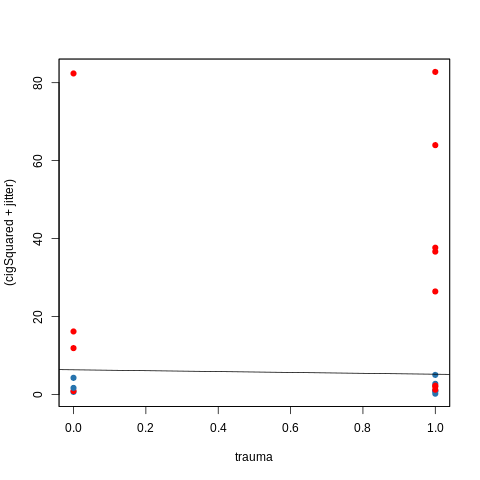

In [0]:
%%R
plot(trauma, (cigSquared + jitter), pch = 19, col = ifelse(mutantLabel==1, "red", uclaBlue))
hyperplane = function(x){
    decisionBoundary = 0.5
    const = decisionBoundary - betaHat[1] 
    return((-betaHat[2]*x + const) / betaHat[3])
}
curve(hyperplane, from = -.2, to = 1.2, n = 100, add = TRUE) # plot hyperplane
box()
# logitModel$coefficients[1]

pred = predict(logitModel)
probs <- exp(pred)/(1+exp(pred)) 
probs[which(probs>0.5)] = 1
probs[which(probs<0.5)] = 0

numWrong = 0
for(i in 1:length(mutantLabel)){
    if(probs[i] != mutantLabel[i]){
        numWrong = numWrong + 1
    }
}
cat("number of wrong predictions = ", numWrong)

# summary(logitModel)

To summarize logistic regression: we model the probability of a binary outcome by finding the $\hat{\beta}$ that maximize $L(\beta \ | \ X)$. The resulting hyperplane depends on our specific choice of a critical probability.

# Likelihood

* What is a likelihood?

* What is a function?

* What defines a function?

A likelihood is the probability of the data given the parameters of the model. The model parameters are the input, whilst the probability of the data is the output.

**Ex:**
Let's return to the coin flip. Let's flip an unfair coin ten times. We'll let $p$ denote the probability of a heads and declare $p = 0.3$. 


In [0]:
%%R
set.seed(28)
N = 10 # number of coin flips
p = 0.3 # probability of heads
coin_flips = rbinom(N, 1, p)
numHeads = sum(coin_flips)
numTails = N - numHeads
cat("number of heads: ", numHeads) # print the number of heads
cat("\nnumber of tails: ", numTails) # print the number of tails

number of heads:  4
number of tails:  6

If we toss the coin once the probability of seeing heads is $0.3$.

The results of our experiment show that we obtained 4 heads and 6 tails.

Since each coin toss does not depend on the previous tosses, the probability of seeing 4 heads and 6 tails (our likelihood) is
$$
p(\text{data}) = p(\text{4 H and 6 T}) = (0.3)^4 (1 - 0.3)^6
$$

Note: this can be seen by a counting argument for a smaller example, (what are all possible outcomes for a 2 coin toss experiment)?

What would be the likelihood of the data if it was a fair coin?

Let's visualize the likelihood the way it was meant to be visualized, as a function of the probability of heads.


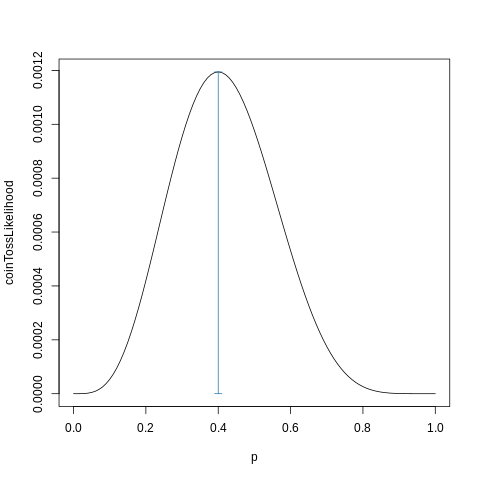

In [0]:
%%R
coinTossLikelihood = function(p){
    likelihood = ((p^numHeads) * ((1-p)^numTails))
#     return(log(likelihood))
#     return(likelihood)
}

plot(coinTossLikelihood, 0, 1, xlab = "p")
arrows(0.4,0,0.4,coinTossLikelihood(0.4), length = 0.05, angle = 90, code = 3, col = uclaBlue)

# Paper example


# Resources

### Math & Stat
[Intuitive Biostatistics](http://www.intuitivebiostatistics.com/excerpts/) 
* [Chapter 1](http://static1.1.sqspcdn.com/static/f/462469/27798351/1515689771813/Motulsky+4e+-+Chapter+1+WM.pdf)

[The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

[The essence of linear algebra](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) (videos)

[Visualizing Uncertainty](https://www.scientificamerican.com/article/how-to-get-better-at-embracing-unknowns/), Scientific American


[What Statistics can and can't tell us about ourselves](https://www.newyorker.com/magazine/2019/09/09/what-statistics-can-and-cant-tell-us-about-ourselves), The New Yorker

[Seeing Theory](https://seeing-theory.brown.edu/index.html), a great resource for visualizing statistics

[Find statistical symbols](http://detexify.kirelabs.org/classify.html)

### Textbooks
[Springer link](https://link.springer.com/) - You can download a large number of free textbooks from this website just by being a UCLA student!

## Historical
[Francis Galton's works](http://galton.org/bibliography/index.html)

___
## Good reads
[The Dunning-Kruger effect](https://pdfs.semanticscholar.org/e320/9ca64cbed9a441e55568797cbd3683cf7f8c.pdf)

[The impostor syndrome](http://mpowir.org/wp-content/uploads/2010/02/Download-IP-in-High-Achieving-Women.pdf)


# Appendix

## Matrix algebra essentials


#### Matrix elements and transpose
Matrix $A$ has elements $a_{ij}$. $i$ denotes the row and $j$ denotes the column of the element, e.g.
\begin{equation}
    A
    =
    \begin{bmatrix}
        a_{11} &  a_{12} & a_{13}\\
        a_{21} & a_{22} & a_{23}\\
        a_{31} & a_{32} & a_{33}
    \end{bmatrix}
\end{equation}

The transpose of a matrix, takes each element $a_{ij}$ and places it in the spot of $a_{ji}$, e.g.
\begin{equation}
    A ^T
    =
    \begin{bmatrix}
        a_{11} &  a_{21} & a_{31}\\
        a_{12} & a_{22} & a_{23}\\
        a_{13} & a_{23} & a_{33}
    \end{bmatrix}
\end{equation}
Notice that the diagonals remain the same and the off-diagonals switch places. If $A$ and $B$ are matrices then the transpose of their product is:
\begin{equation}
(AB) ^T = B ^T A ^T
\end{equation}

#### Matrix vector multiplication
Multiplying a matrix by a vector means you are taking a linear combination of the columns of the matrix. In other words,
\begin{equation}
    \begin{bmatrix}
        1 &  1\\
        2 & 1\\
        3 & 1
    \end{bmatrix}
    \begin{bmatrix}
        \beta_1\\
        \beta_2
    \end{bmatrix}
    =
    \beta_1
    \begin{bmatrix}
        1 \\
        2 \\
        3
    \end{bmatrix}
    +
    \beta_2
    \begin{bmatrix}
        1\\
        1\\
        1
    \end{bmatrix}
\end{equation}
To read more about matrix mulitiplication, see [wikipedia's article on matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication), there are many different perspectives on this single operation!

#### The identity matrix: $I$ (multiplying by 1)
An identity matrix is a square matrix with $1$s on the diagonal and zeros everywhere else.
Multipying any matrix or vector by the appropriately sized identity matrix yields that same matrix or vector, e.g.
\begin{equation}
    \begin{bmatrix}
        1 &  1 & 4\\
        2 & 5 & 3\\
        3 & 1 & 2
    \end{bmatrix}
    \times
    \underbrace{
    \begin{bmatrix}
        1 &  0 & 0\\
        0 & 1 & 0\\
        0 & 0 & 1
    \end{bmatrix}
    }_{\text{identity matrix: ``I''}}
     =
     \begin{bmatrix}
        1 &  1 & 4\\
        2 & 5 & 3\\
        3 & 1 & 2
    \end{bmatrix}
\end{equation}

#### Inverses
A square matrix is a matrix with an equal number of columns and rows.

Some square matrices have inverses, e.g., let $A$ be a matrix. If $A$ has an inverse, it will be denoted $A^{-1}$ and satisfy the property $A A^{-1} = A^{-1} A = I$.

All matrices $B$ of the form $B = A ^T A$ are invertible.



## Least squares optimization

Using the matrix algebra facts above, together with rules for differentiation that can be found in [the matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) we will derive the $\hat{\beta}$ that minimizes the residual sum of squares,
\begin{equation}
    \begin{aligned}
\epsilon ^T \epsilon
&= (y - \hat{y}) ^T (y - \hat{y})\\
&= (y - X \hat{\beta}) ^T (y - X \hat{\beta}).
    \end{aligned}
\end{equation}
To do this, we will take the derivative with respect to $\hat{\beta}$.
\begin{equation}
\newcommand{\gradient}[1]{\frac{\partial}{\partial #1}}
    \begin{aligned}
        \gradient{\hat{\beta}} \epsilon ^T \epsilon
        &=
        \gradient{\hat{\beta}} (y - X \hat{\beta}) ^T (y - X \hat{\beta})\\
        &= \gradient{\hat{\beta}}
        \left[ y ^T y - 2 y ^T X \hat{\beta} + \hat{\beta} ^T X ^T X \hat{\beta} \right]\\
        &= -2 y ^T X + 2 \hat{\beta} ^T X ^T X
    \end{aligned}
\end{equation}
Setting the derivative equal to zero gives us our estimate, $\hat{\beta}$.
\begin{equation}
    \begin{aligned}
        - 2y ^T X + 2 \hat{\beta} ^T X ^T X
        &= 0\\
        \hat{\beta} ^T X ^T X  &= y ^T X\\
        \hat{\beta} ^T = y ^T X (X ^T X )^{-1}
    \end{aligned}
\end{equation}
Transposing both sides, we get:
\begin{equation}
\hat{\beta} = (X ^T X)^{-1} X ^T y
\end{equation}

# R coding